## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

* #### Random Choose Method to get optimal *k* and *b*

In [2]:
from sklearn.datasets import load_boston

In [3]:
data = load_boston()  #房价数据集

In [22]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [28]:
data["feature_names"]

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
X, Y = data["data"], data["target"]

In [5]:
X[1]

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [20]:
len(Y)

506

In [43]:
X[:,2]

array([ 2.31,  7.07,  7.07,  2.18,  2.18,  2.18,  7.87,  7.87,  7.87,
        7.87,  7.87,  7.87,  7.87,  8.14,  8.14,  8.14,  8.14,  8.14,
        8.14,  8.14,  8.14,  8.14,  8.14,  8.14,  8.14,  8.14,  8.14,
        8.14,  8.14,  8.14,  8.14,  8.14,  8.14,  8.14,  8.14,  5.96,
        5.96,  5.96,  5.96,  2.95,  2.95,  6.91,  6.91,  6.91,  6.91,
        6.91,  6.91,  6.91,  6.91,  6.91,  5.64,  5.64,  5.64,  5.64,
        4.  ,  1.22,  0.74,  1.32,  5.13,  5.13,  5.13,  5.13,  5.13,
        5.13,  1.38,  3.37,  3.37,  6.07,  6.07,  6.07, 10.81, 10.81,
       10.81, 10.81, 12.83, 12.83, 12.83, 12.83, 12.83, 12.83,  4.86,
        4.86,  4.86,  4.86,  4.49,  4.49,  4.49,  4.49,  3.41,  3.41,
        3.41,  3.41, 15.04, 15.04, 15.04,  2.89,  2.89,  2.89,  2.89,
        2.89,  8.56,  8.56,  8.56,  8.56,  8.56,  8.56,  8.56,  8.56,
        8.56,  8.56,  8.56, 10.01, 10.01, 10.01, 10.01, 10.01, 10.01,
       10.01, 10.01, 10.01, 25.65, 25.65, 25.65, 25.65, 25.65, 25.65,
       25.65, 21.89,

In [29]:
def price(fea, k, b):
    """价格函数，f(x) = k * x + b"""
    return k * fea + b

In [7]:
import matplotlib.pyplot as plt

In [35]:
def draw_fea_and_price(x):
    """画出rm和房价关系图"""
    plt.scatter(x, Y)

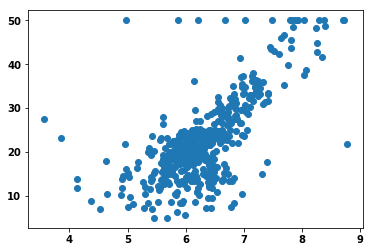

In [50]:
draw_fea_and_price(X[:,5])

### Loss Function

$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}$$

In [27]:
def loss_function(y, y_hat):
    """损失函数"""
    return sum((y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [11]:
import random

In [12]:
X_rm = X[:, 5]

In [62]:
def random_learning_function(times):

    min_loss = float('inf') #正无穷
    best_k = None
    best_b = None

    for i in range(times):
        k = random.random() * 200 - 100
        b = random.random() * 200 - 100
        price_by_random_k_and_b = [price(r, k, b) for r in X_rm] #随机得来的y_hat

        current_loss = loss_function(Y, price_by_random_k_and_b)

        if current_loss < min_loss:
            min_loss = current_loss

            best_k, best_b = k, b
            print("When time is :%s, get best_k:%s best_b:%s, and loss is:%s" % (i, best_k, best_b, min_loss))

In [65]:
random_learning_function(2500)

When time is :0, get best_k:10.175882441183234 best_b:-19.302628090726003, and loss is:533.2978590595221
When time is :21, get best_k:-6.503475792135987 best_b:66.7584530836314, and loss is:174.83588847891568
When time is :24, get best_k:1.2364493643955115 best_b:17.715103299677537, and loss is:82.80270629326017
When time is :52, get best_k:8.393022010385039 best_b:-33.286286802833104, and loss is:53.28557802835524
When time is :859, get best_k:7.2938297983080105 best_b:-24.30541505906227, and loss is:46.209939179818605


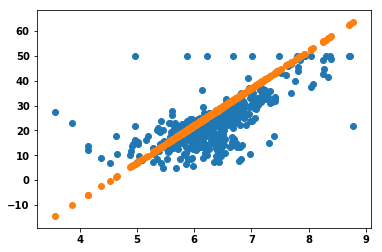

In [67]:
# 根据上面运行情况，尝试k,b值
X_rm = X[:, 5]
k = 15
b = -68
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_fea_and_price(X_rm)
plt.scatter(X_rm, price_by_random_k_and_b)

* #### Supervised Direction to get optimal *k* and *b*

In [75]:
def supervised_learning_function_1(times, scalar):
    """
    times: 次数
    scalar：步长
    """
    min_loss = float('inf') #正无穷
    best_k = random.random() * 200 - 100
    best_b = random.random() * 200 - 100
    
    # 方向
    direction = [ (+1, -1),(+1, +1),(-1, +1),(-1, -1)]

    current_direction = random.choice(direction)

    for i in range(times):
        k_direction, b_direction = current_direction

        current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar

        price_by_random_k_and_b = [price(r, current_k, current_b) for r in X_rm] #y_hat

        current_loss = loss(Y, price_by_random_k_and_b)

        if current_loss < min_loss:
            min_loss = current_loss
            best_k, best_b = current_k, current_b
            current_direction = current_direction
            
            print("When time is :%s, get best_k:%s best_b:%s, and loss is:%s" % (i, best_k, best_b, min_loss))
        else:
            current_direction = random.choice(direction)

In [76]:
supervised_learning_function_1(2500, 0.2)

When time is :0, get best_k:42.83756138659355 best_b:-87.85201856620323, and loss is:158.83358647016468
When time is :6, get best_k:42.637561386593546 best_b:-88.05201856620323, and loss is:157.37665959269424
When time is :7, get best_k:42.43756138659354 best_b:-88.25201856620323, and loss is:155.91973271522383
When time is :8, get best_k:42.23756138659354 best_b:-88.45201856620324, and loss is:154.46280583775348
When time is :9, get best_k:42.03756138659354 best_b:-88.65201856620324, and loss is:153.00587896028293
When time is :10, get best_k:41.837561386593535 best_b:-88.85201856620324, and loss is:151.54895208281283
When time is :11, get best_k:41.63756138659353 best_b:-89.05201856620324, and loss is:150.09202520534242
When time is :12, get best_k:41.43756138659353 best_b:-89.25201856620325, and loss is:148.63509832787196
When time is :13, get best_k:41.237561386593526 best_b:-89.45201856620325, and loss is:147.17817145040172
When time is :14, get best_k:41.037561386593524 best_b:-8

* #### Gradient Descent to get optimal *k* and *b*

Next Lesson Homework

* #### Try different Loss function and learning rate.

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

In [16]:
def loss_function(y, y_hat):
    """a new loss function"""
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [79]:
def supervised_learning_function_2(times, scalar):
    """
    times: 次数
    scalar：步长
    """
    min_loss = float('inf') #正无穷
    best_k = random.random() * 200 - 100
    best_b = random.random() * 200 - 100
    
    # 方向
    direction = [  (+1, -1),(+1, +1),(-1, +1),(-1, -1)]

    current_direction = random.choice(direction)

    for i in range(times):
        k_direction, b_direction = current_direction

        current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar

        price_by_random_k_and_b = [price(r, current_k, current_b) for r in X_rm] #y_hat

        current_loss = loss(Y, price_by_random_k_and_b)

        if current_loss < min_loss:
            min_loss = current_loss

            best_k, best_b = current_k, current_b
            current_direction = current_direction
            print("When time is :%s, get best_k:%s best_b:%s, and loss is:%s" % (i, best_k, best_b, min_loss))
        else:
            current_direction = random.choice(direction) # 缺点：随机取方向

In [80]:
supervised_learning_function_1(2000, 0.3)

When time is :0, get best_k:-23.803600733569656 best_b:-80.83789378631253, and loss is:252.9676278234072
When time is :3, get best_k:-23.503600733569655 best_b:-80.53789378631254, and loss is:250.7822375072016
When time is :4, get best_k:-23.203600733569655 best_b:-80.23789378631254, and loss is:248.5968471909958
When time is :5, get best_k:-22.903600733569654 best_b:-79.93789378631254, and loss is:246.41145687479042
When time is :6, get best_k:-22.603600733569653 best_b:-79.63789378631255, and loss is:244.22606655858505
When time is :7, get best_k:-22.303600733569652 best_b:-79.33789378631255, and loss is:242.0406762423795
When time is :8, get best_k:-22.00360073356965 best_b:-79.03789378631255, and loss is:239.85528592617402
When time is :9, get best_k:-21.70360073356965 best_b:-78.73789378631255, and loss is:237.66989560996848
When time is :10, get best_k:-21.40360073356965 best_b:-78.43789378631256, and loss is:235.48450529376285
When time is :11, get best_k:-21.10360073356965 best

***

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans : 1.构造一个复杂的函数是比较难 2. 数据不断在变化，对于新的数据，给定函数得到的结果一般来说不准确

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans: 随机的k,b构造的函数所得到的的结果好坏都是随机的，没有优化的方向

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans: 第二种方法好于第一种方法，缺点：1.多元或者多变量函数，方向组合变的更大更复杂 2.对于min_loss条件不成立时，direction取随机也是无优化方向的

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans: 待补充。。。

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans: 待补充。。。

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans: 待补充。。。

###### 7. Using the simple words to describe: What's the machine leanring.

Ans: 待补充。。。

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



## （Optional）Create different policies for transfer system.


以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)